In [1]:
# 读取数据
import csv
live_id = []  
author = [] 
seg_id = []
start_timestamp = []
start = [] 
end = [] 
emb = []
with open('data.csv','r') as f:
    reader = csv.reader((line.replace('\0','') for line in f), delimiter = ",")
    i = 0
    for row in reader:
        if i == 80000:
            break
        i += 1
        live_id.append(row[0])
        if row[1] != '':
            author.append(row[1])
        else:
            author.append('0')
            
        if row[2] != '':
            start_timestamp.append(row[2])
        else:
            start_timestamp.append('0')
            
        seg_id.append(row[3])
        start.append(row[4])
        end.append(row[5])
        emb.append(row[6:]) 

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


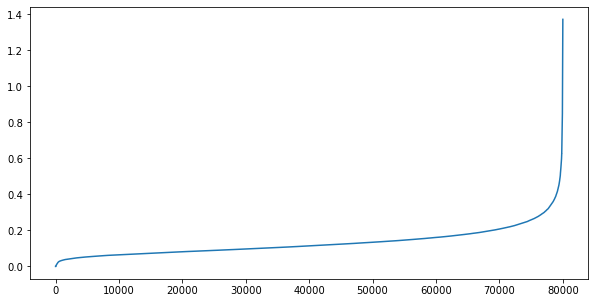

In [4]:
# 聚类算法，DBSCAN
import sklearn
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(emb)
distances, idx = nn.kneighbors(emb)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [2]:
# 64维 embedding, min_samples 设置成64
from sklearn.cluster import DBSCAN
# 参数可改
db = DBSCAN(eps=0.3, min_samples=20).fit(emb)

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the ar

In [3]:
labels = db.labels_

In [4]:
from collections import defaultdict
dic = defaultdict(list)
for i in range(len(labels)):
    if labels[i] != 0 and labels[i] != -1:
   # if labels[i] != -1:
        dic[labels[i]].append(i)
#簇中心计算：以均值作为类中心。 -1是离散点，不计算
#格式： {0:64维向量， 1:64维向量。。。} 0 表示聚类标签为0，64维向量是聚类标签为0的数据的emb的均值。
core = {}
for i in dic:
    if dic[i] != [] and i != -1:
        temp = [0]*64
        if dic[i] != -1 and dic[i] != 0:
            for j in range(len(dic[i])):
                temp = [(temp[k] + float(emb[dic[i][j]][k])) for k in range(64)]
            temp = [j / len(dic[i]) for j in temp]
            core[i] = temp

In [5]:
count_labels = defaultdict(int)
for i in range(len(labels)):
    count_labels[labels[i]] += 1

In [6]:
count_labels

defaultdict(int,
            {-1: 30095,
             0: 35121,
             1: 20,
             2: 25,
             3: 28,
             4: 20,
             5: 28,
             6: 33,
             7: 21,
             8: 34,
             9: 31,
             10: 91,
             11: 59,
             12: 118,
             13: 20,
             14: 31,
             95: 20,
             15: 29,
             16: 21,
             17: 93,
             18: 33,
             19: 93,
             20: 20,
             21: 94,
             22: 31,
             23: 33,
             24: 22,
             89: 52,
             25: 28,
             104: 23,
             26: 103,
             27: 52,
             28: 36,
             29: 34,
             30: 62,
             31: 107,
             233: 20,
             32: 76,
             33: 25,
             34: 23,
             35: 22,
             36: 26,
             37: 32,
             38: 53,
             39: 33,
             40: 37,
             41:

In [12]:
# 一个id平均被分到几个类
#ans = 0
#dic_author = defaultdict(list)
#for i in range(len(author)):
#    if author != '0':
#        dic_author[author[i]].append(i) 

#for key in dic_author:
#    sets = set()
#    for i in range(len(dic_author[key])):
#        sets.add(labels[dic_author[key][i]])
#    ans += len(sets)
#ans /= len(dic_author)
#ans

# 去除 -1 类（离散点） 与 0 类后的统计
ans = 0
dic_author = defaultdict(list)
for i in range(len(author)):
    if author != '0' and labels[i] != 0 and labels[i] != -1:
        dic_author[author[i]].append(i) 

for key in dic_author:
    sets = set()
    for i in range(len(dic_author[key])):
        sets.add(labels[dic_author[key][i]])
    ans += len(sets)
ans /= len(dic_author)
ans

1.921259842519685

In [13]:
# 一个类平均有几个id
ans = 0
for key in dic:
    sets = set()
    for i in range(len(dic[key])):
        sets.add(author[dic[key][i]])
    ans += len(sets)
ans /= len(dic)
ans

1.1730769230769231

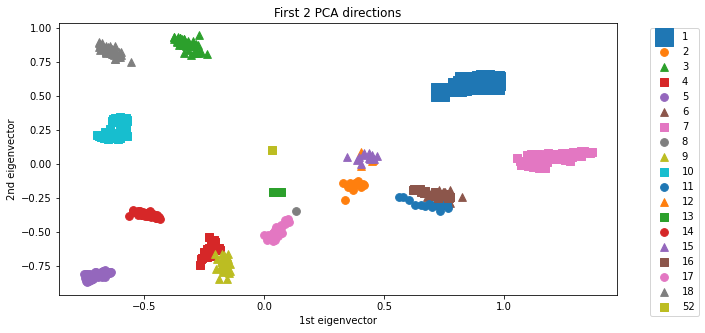

In [17]:
# 二维可视化
# 可视化结果
import sklearn
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
# 选择3000个点可视化
X_small = [] 
y_small = []
for i in range(6000):
    if labels[i] != -1 and labels[i] != 0:
  #  if labels[i] != -1:
        X_small.append(emb[i])
        y_small.append(labels[i])

# PCA降到三维
pca_3 = PCA(n_components=3)
X_PCA_3 = pca_3.fit_transform(X_small)

# 二维作图
plt.figure(figsize=(10,5))
style = y_small
markers = ["s","o", "^"]
for i, c in enumerate(np.unique(y_small)):
    s = 60 if i != 0 else 300
    plt.scatter(X_PCA_3[:, 0][y_small==c], X_PCA_3[:, 1][y_small==c],
                marker=markers[i%3], s=s, label=int(c))
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First 2 PCA directions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [18]:
def cal_cos(A,B):
    vector1 = np.array(A)
    vector2 = np.array(B)
    op = np.dot(vector1,vector2)/(np.linalg.norm(vector1)*(np.linalg.norm(vector2)))
    return abs(op)
        
# 类内方差最大和最小的簇
mins_nei = float('INF')
maxs_nei = -float('INF')
minnei_labels = 0
maxnei_labels = 0
for key in core:
    sums = 0
    for i in range(len(dic[key])):
        embedding = [float(i) for i in emb[dic[key][i]]]
        sums += cal_cos(core[key],embedding)
    sums /= len(dic[key])
    if sums < mins_nei:
        mins_nei = sums
        minnei_labels = key
    if sums > maxs_nei:
        maxs_nei = sums
        maxnei_labels = key

# 类间距离最大和最小的簇
mins = float('INF')
maxs = -float('INF')
min_labels = (0,0)
max_labels = (0,0)
key_list = list(core.keys())

for i in range(len(key_list)):
    for j in range(i+1, len(key_list)):
        distance = cal_cos(core[key_list[i]],core[key_list[j]])
        if distance < mins:
            mins = distance
            min_labels = (key_list[i],key_list[j])
        if distance > maxs:
            maxs = distance
            max_labels = (key_list[i],key_list[j])    

In [19]:
print('类内方差最大的簇为{}'.format(minnei_labels))
print('类内方差最大的簇与簇中心点的平均余弦距离为{}'.format(mins_nei))
print('类内方差最小的簇为{}'.format(maxnei_labels))
print('类内方差最小的簇与簇中心点的平均余弦距离为{}'.format(maxs_nei))
print('类间距离最大的簇为{}'.format(min_labels))
print('类间距离最大两个簇之间的余弦距离为{}'.format(mins))
print('类间距离最小的簇为{}'.format(max_labels))
print('类间距离最小两个簇之间的余弦距离为{}'.format(maxs))

类内方差最大的簇为148
类内方差最大的簇与簇中心点的平均余弦距离为0.9750302115126627
类内方差最小的簇为58
类内方差最小的簇与簇中心点的平均余弦距离为0.9970524955084339
类间距离最大的簇为(92, 169)
类间距离最大两个簇之间的余弦距离为3.720512323295249e-05
类间距离最小的簇为(44, 45)
类间距离最小两个簇之间的余弦距离为0.9358295353044555


In [17]:
import math
def cal_euc(A,B):
    res = math.sqrt(sum([(A[i]- B[i])**2 for i in range(len(A))]))
    return res
print(cal_euc(core[201],core[1083]))
print(mins)

print(cal_euc(core[34],core[928]))
print(maxs)

2.2551467296741494
6.056590234955018e-08
0.4100806894361948
0.9719599250144433


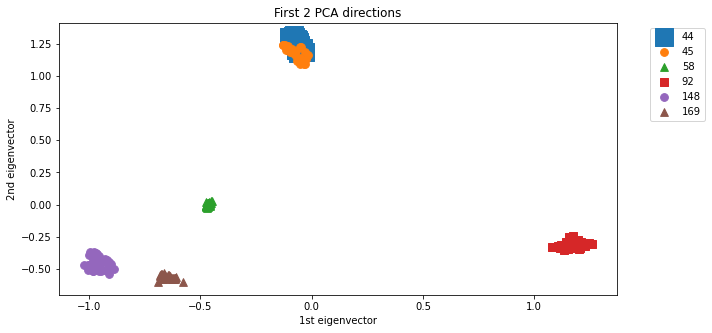

In [20]:
X_small = [] 
y_small = []
for i in range(len(emb)):
  #  if labels[i] != -1 and labels[i] != 1:
    if labels[i] in [minnei_labels, maxnei_labels,min_labels[0], min_labels[1], max_labels[0], max_labels[1] ]:
        X_small.append(emb[i])
        y_small.append(labels[i])

# PCA降到三维
pca_3 = PCA(n_components=3)
X_PCA_3 = pca_3.fit_transform(X_small)

# 二维作图
plt.figure(figsize=(10,5))
style = y_small
markers = ["s","o", "^"]
for i, c in enumerate(np.unique(y_small)):
    s = 60 if i != 0 else 300
    plt.scatter(X_PCA_3[:, 0][y_small==c], X_PCA_3[:, 1][y_small==c],
                marker=markers[i%3], s=s, label=int(c))
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First 2 PCA directions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [21]:
# 输出数据
# 类内方差最大.csv, 类内方差最小.csv, 大类.csv(30%的数据被归为1类)
def save(filename,name):
    header = ['random_live.live_id',' author_table.author','live_start_timestamp_s','seg_id','starttime_ms','endtime_ms']
    rows = zip(
        [live_id[i] for i in dic[name]],
        [author[i] for i in dic[name]],
        [start_timestamp[i] for i in dic[name]],
        [seg_id[i] for i in dic[name]],
        [start[i] for i in dic[name]],
        [end[i] for i in dic[name]]
    )
    with open(filename, 'w', newline='') as fp:
        writer = csv.writer(fp)
        writer.writerow(header)
        for row in rows:
            writer.writerow(row)      

In [22]:
save('类内方差最大.csv',minnei_labels)
save('类内方差最小.csv',maxnei_labels)

In [32]:
def save2(filename,name):
    header = ['random_live.live_id',' author_table.author','live_start_timestamp_s','seg_id','starttime_ms','endtime_ms']
    dicts = []
    for i in range(len(labels)):
        if labels[i] == name:
            dicts.append(i)
    rows = zip(
        [live_id[i] for i in dicts],
        [author[i] for i in dicts],
        [start_timestamp[i] for i in dicts],
        [seg_id[i] for i in dicts],
        [start[i] for i in dicts],
        [end[i] for i in dicts]
    )
    with open(filename, 'w', newline='') as fp:
        writer = csv.writer(fp)
        writer.writerow(header)
        for row in rows:
            writer.writerow(row) 
save2('大类.csv',0)

In [24]:
# 类间距离最大.csv, 类间距离最小.csv
def save1(filename,name1,name2):
    header = ['random_live.live_id_1',' author_table.author_1','live_start_timestamp_s_1','seg_id_1','starttime_ms_1','endtime_ms_1','random_live.live_id_2',' author_table.author_2','live_start_timestamp_s_2','seg_id_2','starttime_ms_2','endtime_ms_2']
    rows = zip(
        [live_id[i] for i in dic[name1]],
        [author[i] for i in dic[name1]],
        [start_timestamp[i] for i in dic[name1]],
        [seg_id[i] for i in dic[name1]],
        [start[i] for i in dic[name1]],
        [end[i] for i in dic[name1]],
        [live_id[i] for i in dic[name2]],
        [author[i] for i in dic[name2]],
        [start_timestamp[i] for i in dic[name2]],
        [seg_id[i] for i in dic[name2]],
        [start[i] for i in dic[name2]],
        [end[i] for i in dic[name2]]
    )
    with open(filename, 'w', newline='') as fp:
        writer = csv.writer(fp)
        writer.writerow(header)
        for row in rows:
            writer.writerow(row)      

In [25]:
save1('类间距最大.csv',min_labels[0],min_labels[1])
save1('类间距最小.csv',max_labels[0],max_labels[1])

In [29]:
print('统计数据中author个数{}'.format(len(set(author))))
print('聚类数为{}'.format(len(set(labels))-1))

统计数据中author个数2550
聚类数为209


In [30]:
authors = []
for i in range(len(labels)):
    if labels[i] != -1 and labels[i] != 0:
        authors.append(author[i])
print('统计数据中author个数(去除大类){}'.format(len(set(authors))))
print('大类中的author数为{}'.format(len(set(author))- len(set(authors)) ))
print('聚类数为(去除大类){}'.format(len(set(labels))-2))       

统计数据中author个数(去除大类)127
大类中的author数为2423
聚类数为(去除大类)208


In [28]:
print('大类数据个数{}'.format(sum([1 for i in labels if i == 1])))  
print('离散点个数{}'.format(sum([1 for i in labels if i != 1 and i != -1]))) 
print('聚类数据个数{}'.format(sum([1 for i in labels if i == -1])))

大类数据个数33
离散点个数46906
聚类数据个数33061


In [32]:
dic[961]

[63907,
 63908,
 63909,
 63910,
 63911,
 63912,
 63913,
 63914,
 63915,
 63916,
 63917,
 63918,
 63919,
 63920,
 63921,
 63922,
 63923,
 63924,
 63925,
 63926,
 63927,
 63928,
 63929,
 63930,
 63931,
 63932,
 63933,
 63934,
 63935,
 63936,
 63937,
 63938,
 63939,
 63940,
 63941,
 63942,
 63943,
 63944,
 63945,
 63946,
 63947,
 63948,
 63949,
 63950,
 63951,
 63952,
 63953,
 63954,
 63955,
 63956,
 63957,
 63958,
 63959,
 63960,
 63961,
 63962,
 63963,
 63964,
 63965,
 63966,
 63967,
 63968,
 63969,
 63970,
 63971,
 63972,
 63973,
 63974,
 63975,
 63976,
 63977,
 63978,
 63979,
 63980,
 63981,
 63982,
 63983,
 63984,
 63985,
 63986,
 63987,
 63988,
 63989,
 63990,
 63991,
 63992,
 63993,
 63994,
 63995,
 63996,
 63997,
 63998,
 63999,
 64000,
 64001,
 64002,
 64003,
 64004,
 64005,
 64006,
 64007,
 64008,
 64009,
 64010,
 64011,
 64012,
 64013,
 64014,
 64015,
 64016,
 64017,
 64018,
 64019,
 64020,
 76646,
 76648,
 76649,
 76650,
 76651,
 76652,
 76653,
 76656,
 76657,
 76658,
 76659,


In [ ]:
for i in range(len(dic[961])):
    